In [5]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings("ignore")

In [8]:
# Cargar el dataset
df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [9]:
#Analisis Exploratorio de los datos

In [10]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [11]:
# Descripción estadística de los datos numéricos
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


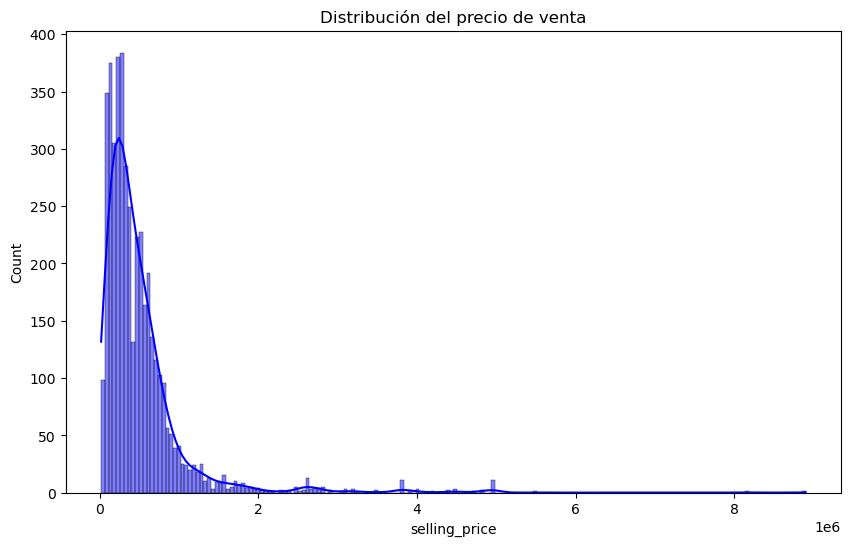

In [12]:
# Visualización de la distribución del precio de venta
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], kde=True, color="blue")
plt.title("Distribución del precio de venta")
plt.show()

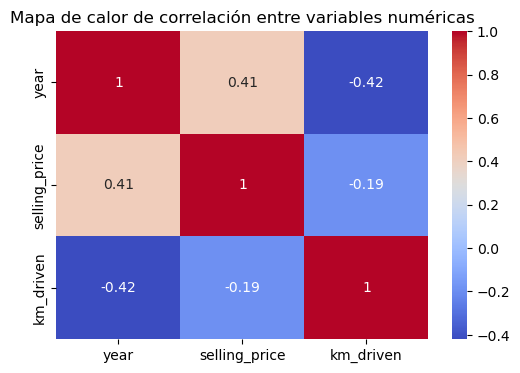

In [13]:
# Seleccionar solo las columnas numéricas
numerical_df = df.select_dtypes(include=[np.number])

# Mapa de calor de correlación para columnas numéricas
plt.figure(figsize=(6, 4))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm")
plt.title("Mapa de calor de correlación entre variables numéricas")
plt.show()

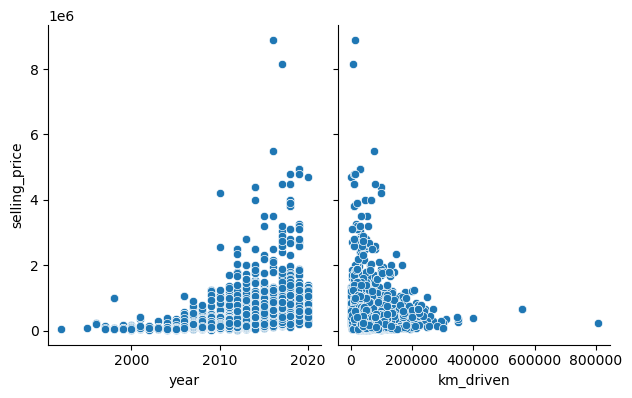

In [14]:
# Visualización de la relación entre el precio de venta y otras variables numéricas
sns.pairplot(df, x_vars=['year', 'km_driven'], y_vars='selling_price', height=4, aspect=0.8)
plt.show()

In [15]:
# Preprocesamiento de datos

In [16]:
# Eliminar duplicados
df.drop_duplicates(inplace=True)

In [17]:
# Identificación y eliminación de valores atípicos usando el rango intercuartílico (IQR)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [18]:
# Aplicar la función para eliminar valores atípicos en "selling_price" y "km_driven"
df = remove_outliers(df, 'selling_price')
df = remove_outliers(df, 'km_driven')

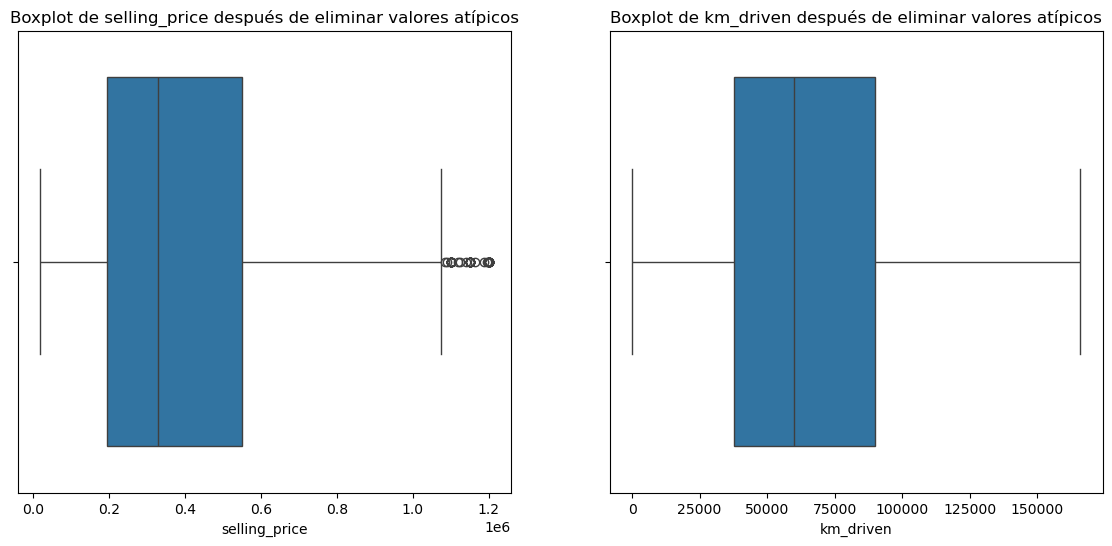

In [19]:
# Confirmar la eliminación de valores atípicos
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['selling_price'])
plt.title("Boxplot de selling_price después de eliminar valores atípicos")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['km_driven'])
plt.title("Boxplot de km_driven después de eliminar valores atípicos")
plt.show()

In [20]:
# Seleccionar solo las columnas numéricas
numerical_df = df.select_dtypes(include=[np.number])

# Manejo de valores faltantes (si existen)
numerical_df.fillna(numerical_df.median(), inplace=True)

In [21]:
# Transformar variables categóricas en numéricas
label_cols = ['name', 'fuel', 'seller_type', 'transmission', 'owner']
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [22]:
# Normalización de variables numéricas
scaler = StandardScaler()
num_cols = ['km_driven']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [23]:
# Seleccion de caracteristicas

In [24]:
# Definir variables independientes y dependientes
X = df.drop(['selling_price'], axis=1)
y = df['selling_price']

In [25]:
# Selección de las 5 características más importantes
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)

In [26]:
# Mostrar las características seleccionadas
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)

Características seleccionadas: Index(['year', 'km_driven', 'fuel', 'transmission', 'owner'], dtype='object')


In [27]:
#Dividir el Dataset en Train y Test

In [28]:
# Dividir el conjunto de datos en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

In [29]:
#Entrenar el Modelo de Regresión Lineal

In [30]:
# Definir y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Predicción en el conjunto de prueba
y_pred = model.predict(X_test)

In [32]:
#Evaluar el Desempeño del Modelo

In [33]:
# Cálculo de métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 33323935361.80109
Mean Absolute Error (MAE): 138091.2170874813
R-squared (R²): 0.5151954753380132


In [34]:
#Visualización de los resultados del modelo

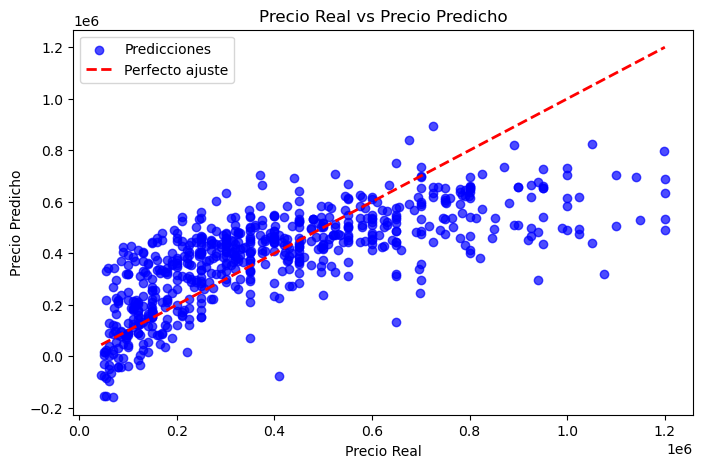

In [35]:
# Gráfica de dispersión de valores predichos vs valores reales
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='b', label="Predicciones")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfecto ajuste")
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Precio Real vs Precio Predicho")
plt.legend()
plt.show()

In [36]:
#Analisis de la grafica
print ("muestra los valores reales frente a los valores predichos con una línea roja que representa el ajuste perfecto.")

muestra los valores reales frente a los valores predichos con una línea roja que representa el ajuste perfecto.


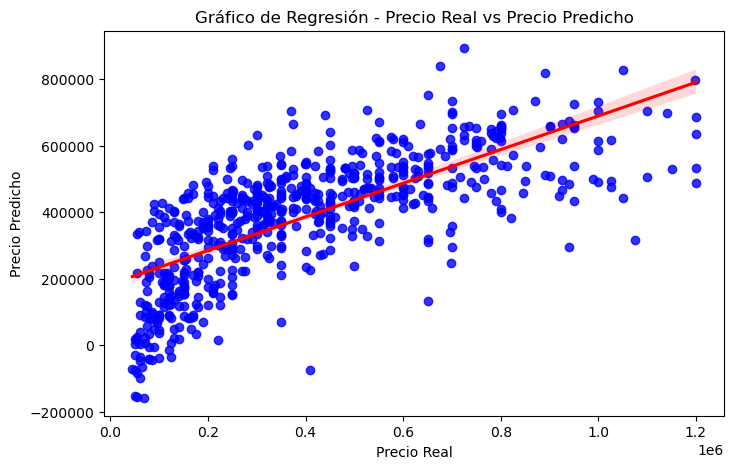

In [37]:
# Gráfico de regresión para visualizar la tendencia de predicción
plt.figure(figsize=(8, 5))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Gráfico de Regresión - Precio Real vs Precio Predicho")
plt.show()

In [38]:
#Analisis Grafica

print ("La gráfica utiliza una regresión lineal para mostrar la tendencia general de las predicciones frente a los valores reales")

La gráfica utiliza una regresión lineal para mostrar la tendencia general de las predicciones frente a los valores reales


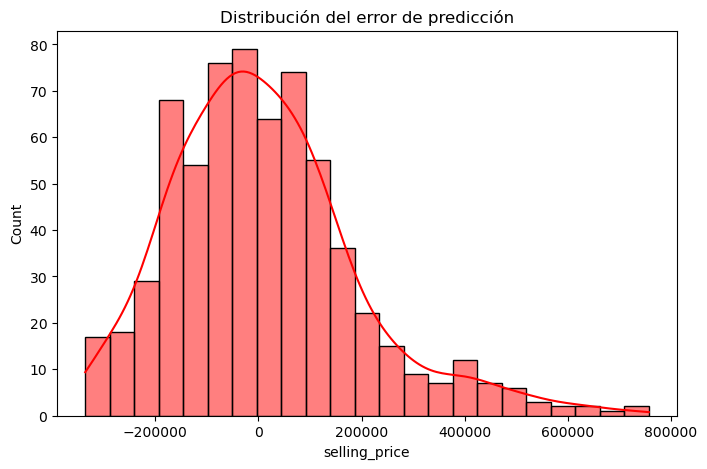

In [39]:
# Gráfica del error de predicción
plt.figure(figsize=(8, 5))
sns.histplot(y_test - y_pred, kde=True, color="red")
plt.title("Distribución del error de predicción")
plt.show()

In [40]:
print (""" Interpretación de resultados:\n\nMSE y MAE: Reflejan el error promedio de predicción. Cuanto menores sean estos valores, mejor será el ajuste del modelo.\n
R²: Cuanto más cercano esté a 1, mejor será el desempeño del modelo para explicar la variabilidad del precio.\n
Gráficas de valores predichos vs reales: Idealmente, los puntos deberían alinearse con una línea recta. Desviaciones importantes podrían indicar áreas donde el modelo no ajusta correctamente.\n
Distribución del error de predicción: Nos muestra la diferencia entre los valores reales y predichos, donde un error cercano a cero indica una mejor predicción.""")

 Interpretación de resultados:

MSE y MAE: Reflejan el error promedio de predicción. Cuanto menores sean estos valores, mejor será el ajuste del modelo.

R²: Cuanto más cercano esté a 1, mejor será el desempeño del modelo para explicar la variabilidad del precio.

Gráficas de valores predichos vs reales: Idealmente, los puntos deberían alinearse con una línea recta. Desviaciones importantes podrían indicar áreas donde el modelo no ajusta correctamente.

Distribución del error de predicción: Nos muestra la diferencia entre los valores reales y predichos, donde un error cercano a cero indica una mejor predicción.
